# Task 3: `Clustering Analysis - Customer Segmentation`
**Objective:** Perform customer segmentation using clustering techniques to group customers based on their purchasing behavior.

## Step 1: Load and Explore the Dataset

In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv("C:/Users/hp/Downloads/customer_data.csv")
df.head()

,Customer ID,Age,Annual Income,Spending Score
0,1001,56,36959,1
1,1002,69,134101,34
2,1003,46,18748,96
3,1004,32,28545,48
4,1005,60,142659,89


In [2]:
df.shape

(200, 4)

In [3]:
df.dtypes

Customer ID       int64
Age               int64
Annual Income     int64
Spending Score    int64
dtype: object

In [4]:
df.isnull().sum()

Customer ID       0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,Customer ID,Age,Annual Income,Spending Score
count,200.000000,200.00000,200.000000,200.000000
mean,1100.500000,43.42500,86952.155000,49.500000
std,57.879185,14.94191,40939.384144,29.353332
min,1001.000000,18.00000,17368.000000,1.000000
25%,1050.750000,31.00000,49740.000000,23.750000
50%,1100.500000,43.50000,89293.500000,48.500000
75%,1150.250000,56.00000,124832.750000,75.000000
max,1200.000000,69.00000,149508.000000,99.000000


## Step 2: Data Preprocessing

In [7]:
from sklearn.preprocessing import StandardScaler

# Drop Customer ID
X = df.drop('Customer ID', axis=1)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 3: Determine Optimal Clusters Using Elbow Method

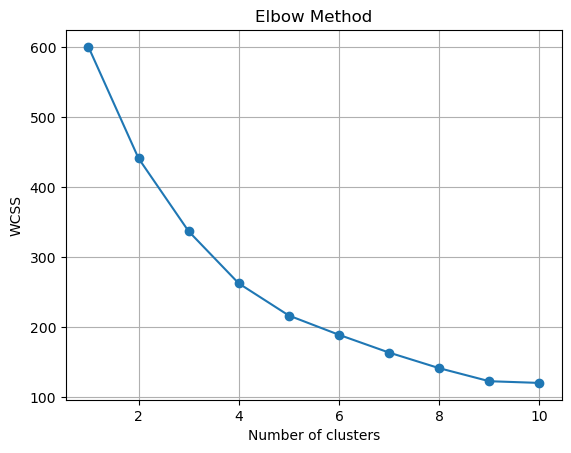

In [8]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [9]:
# Final clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.head()

,Customer ID,Age,Annual Income,Spending Score,Cluster
0,1001,56,36959,1,2
1,1002,69,134101,34,1
2,1003,46,18748,96,2
3,1004,32,28545,48,2
4,1005,60,142659,89,1


## Step 4: Visualizing

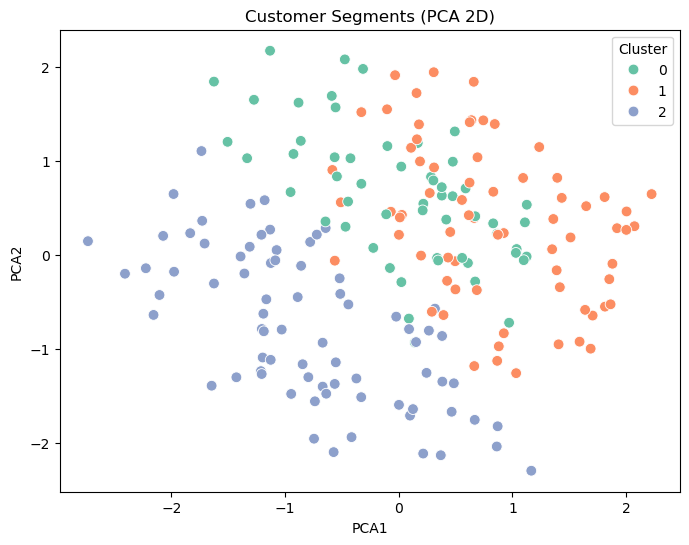

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title('Customer Segments (PCA 2D)')
plt.show()

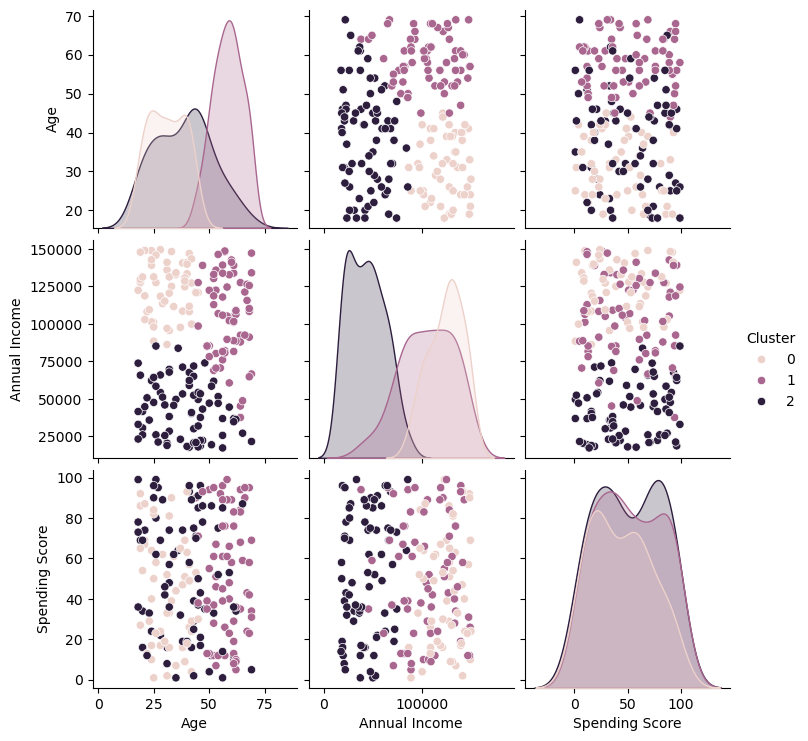

In [11]:
# Pair plot 
sns.pairplot(df, hue='Cluster', vars=['Age', 'Annual Income', 'Spending Score'])

In [12]:
df.groupby('Cluster').mean()

,Customer ID,Age,Annual Income,Spending Score,PCA1,PCA2
Cluster,,,,,,
0,1094.181818,30.945455,123789.381818,44.090909,0.013002,0.634350
1,1105.071429,58.285714,105020.171429,51.685714,0.834273,0.329500
2,1100.866667,38.706667,43074.706667,51.426667,-0.788190,-0.772724
